##INDIAN PREMIER LEAGUE DATA ANALYSIS:

HIGHLIGHTS OF THE DATA:


*   The data avalibale is from the year 2008 to 2019.
*   The data has information about the team performances and individual performance is not availbale.



**Topics covered in Analysis:**


1.   Most successful teams over the years.
2.   Most successful team year by year.   
3.   Impact of toss on the result.
4.   Impact of batting and fielding first on result.
5.   Best performers over the years.










In [1]:
## importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve('https://github.com/ashutoshkrris/Data-Analysis-with-Python/raw/master/zerotopandas-course-project-starter/dataset/matches.csv','matches.csv')

('matches.csv', <http.client.HTTPMessage at 0x7f79d49dae90>)

In [4]:
## assigning data as df:

df = pd.read_csv("matches.csv")

##Overview of the dataset:

In [5]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df.shape

(756, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

##Inference from the overview:


*   Our dataset has 18 columns with most columns having dtype as object.
*   There are some null values present in our dataset but those are only few in numbers.

*   Some columns like umpire are of hardly any use.




In [9]:
## droping this 3 columns since they won't help us in exploration since there aren't any information related to right or wrong decisions given by umpires.

df = df.drop(["umpire1","umpire2","umpire3"],axis=1)

In [10]:
## dropping id column as well:
df = df.drop("id",axis=1)

In [11]:
## checking the value counts for each season which will let us know the number of matches being conducted in that season.
## The numbers vary due to obvious reasons like more number of teams in some season and different format in some seasons.

df.Season.value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2014    60
IPL-2018    60
IPL-2019    60
IPL-2016    60
IPL-2010    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [12]:
## checking number of matches in which duckworth-lewis methods were used.

df.dl_applied.value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [13]:
from datetime import datetime

In [14]:
df.date = pd.to_datetime(df["date"])

In [15]:
df.date

0     2017-05-04
1     2017-06-04
2     2017-07-04
3     2017-08-04
4     2017-08-04
         ...    
751   2019-05-05
752   2019-07-05
753   2019-08-05
754   2019-10-05
755   2019-12-05
Name: date, Length: 756, dtype: datetime64[ns]

In [16]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,2017-08-04,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [17]:
## looking at all team names.

df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [18]:
## Modifying names of all the teams for following reaons:

## 1. shorter names will make calling the names of teams very easy during exploration.

## 2. It won't create any confusion since most of the times teams are called with their reduced names.

## 3. Some teams have changed their after some years like Delhi and Hyderabad.

## 4. labelling will be easy during graphical plotting.

df = df.replace({'Sunrisers Hyderabad':"SRH", 'Mumbai Indians': "MI", 'Gujarat Lions':"GL",
       'Rising Pune Supergiants': "Pune", 'Royal Challengers Bangalore': "RCB",
       'Kolkata Knight Riders': "KKR", 'Delhi Daredevils': "Delhi", 'Kings XI Punjab':"Punjab",
       'Chennai Super Kings':"CSK", 'Rajasthan Royals': "RR", 'Deccan Chargers':"SRH",
       'Kochi Tuskers Kerala':"KTK", 'Pune Warriors':"Pune", 'Delhi Capitals':"Delhi"})

In [19]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,Hyderabad,2017-05-04,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,2017-06-04,MI,Pune,Pune,field,normal,0,Pune,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,2017-07-04,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,2017-08-04,Pune,Punjab,Punjab,field,normal,0,Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bangalore,2017-08-04,RCB,Delhi,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium


In [20]:
## The most basic criteria before exploration is making sure that there isn't any null values.

df.isnull().sum()

Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [21]:
## There are 4 null values in city column.

## Though the city column is null but the venue column can help us fill those values.

## all null values belong to season 2014.

df[df["city"].isnull()]

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,IPL-2014,NaN,2014-04-19,MI,RCB,RCB,field,normal,0,RCB,0,7,PA Patel,Dubai International Cricket Stadium
462,IPL-2014,NaN,2014-04-19,KKR,Delhi,KKR,bat,normal,0,Delhi,0,4,JP Duminy,Dubai International Cricket Stadium
466,IPL-2014,NaN,2014-04-23,CSK,RR,RR,field,normal,0,CSK,7,0,RA Jadeja,Dubai International Cricket Stadium
468,IPL-2014,NaN,2014-04-25,SRH,Delhi,SRH,bat,normal,0,SRH,4,0,AJ Finch,Dubai International Cricket Stadium
469,IPL-2014,NaN,2014-04-25,MI,CSK,MI,bat,normal,0,CSK,0,7,MM Sharma,Dubai International Cricket Stadium
474,IPL-2014,NaN,2014-04-28,RCB,Punjab,Punjab,field,normal,0,Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,IPL-2014,NaN,2014-04-30,SRH,MI,MI,field,normal,0,SRH,15,0,B Kumar,Dubai International Cricket Stadium


In [22]:
## checking all season whose data is available in the dataset.

df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [23]:
## changing the season name as per year which will make calling those season easy.

df = df.replace({'IPL-2017':2017, 'IPL-2008':2008, 'IPL-2009':2009, 'IPL-2010':2010, 'IPL-2011':2011,
       'IPL-2012':2012, 'IPL-2013':2013, 'IPL-2014':2014, 'IPL-2015':2015, 'IPL-2016':2016,
       'IPL-2018':2018, 'IPL-2019':2019})

In [24]:
df.head(2)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-05-04,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-06-04,MI,Pune,Pune,field,normal,0,Pune,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [25]:
## checking all city names for 2014 season.

df[df["Season"] == 2014].city.unique()

array(['Abu Dhabi', 'Sharjah', nan, 'Ranchi', 'Mumbai', 'Delhi',
       'Bangalore', 'Ahmedabad', 'Cuttack', 'Hyderabad', 'Kolkata',
       'Chandigarh'], dtype=object)

In [26]:
## checking all venue names for 2014 season.

df[df["Season"] == 2014].venue.unique()

array(['Sheikh Zayed Stadium', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium',
       'JSCA International Stadium Complex', 'Wankhede Stadium',
       'Feroz Shah Kotla', 'M Chinnaswamy Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Eden Gardens',
       'Punjab Cricket Association Stadium, Mohali', 'Brabourne Stadium'],
      dtype=object)

In [27]:
## we had 4 null values in city column whose venue was Dubai International stadium which implies that city would have been Dubai.

## So filling those missing values with "Dubai".

df["city"] = df["city"].fillna("Dubai")

In [28]:
## looking at the list we are left with 4 null values in winner and 4 null values in player of the match.

df.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [29]:
## looking at below filtered table in which the winner column was null we can say following things:

## 1. The null values doesn't correspond to missing values but rather the match was called off.

## 2. So we will not drop these columns but rather fill some appropriate value for the same.

df[df["winner"].isnull()]

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,2011,Delhi,2011-05-21,Delhi,Pune,Delhi,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,2015,Bangalore,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,2015,Bangalore,2015-05-17,Delhi,RCB,RCB,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,2019,Bengaluru,2019-04-30,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [30]:
## filling null values in winner and player of the match column:

df.winner = df.winner.fillna("None")

df.player_of_match = df.player_of_match.fillna("None")

In [31]:
## we can see that our data doesn't have any null values.
df.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [32]:
df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [33]:
df.head(3)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-05-04,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-06-04,MI,Pune,Pune,field,normal,0,Pune,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,2017-07-04,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium


In [34]:
## Looking at teams with most number of wins:

## we have used [:-1] to left out the last row since it contained none for 4 matches which were unable to take place.

most_wins_df = df['winner'].value_counts()[:-1]

most_wins_df = pd.DataFrame(most_wins_df)

In [35]:
most_wins_df

,winner
MI,109
CSK,100
KKR,92
SRH,87
RCB,84
Punjab,82
Delhi,77
RR,75
Pune,27
GL,13


In [36]:
most_wins_df.index

Index(['MI', 'CSK', 'KKR', 'SRH', 'RCB', 'Punjab', 'Delhi', 'RR', 'Pune', 'GL',
       'KTK'],
      dtype='object')

In [37]:
sns.set_style("darkgrid")

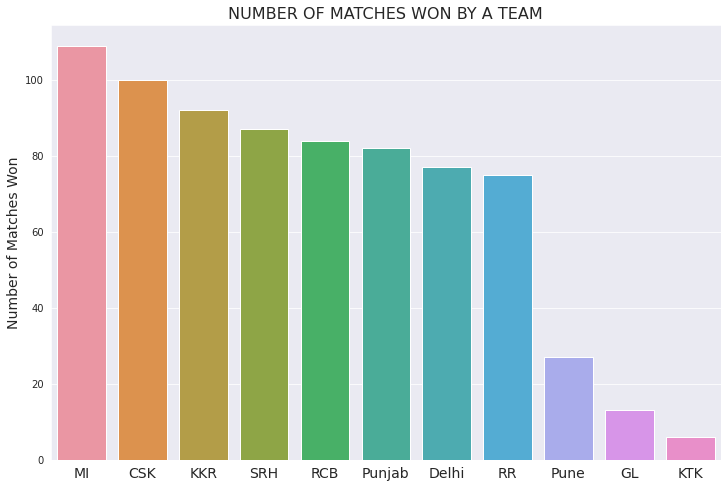

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x = most_wins_df.index,y = most_wins_df.winner)
plt.ylabel("Number of Matches Won",fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("NUMBER OF MATCHES WON BY A TEAM",{"fontsize":16});

In [39]:
## looking at most man of the match awards:

most_mom_df = pd.DataFrame(data = df["player_of_match"].value_counts())
most_mom_df = most_mom_df.reset_index()

In [40]:
most_mom_df

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
...,...,...
222,CRD Fernando,1
223,CR Brathwaite,1
224,YS Chahal,1
225,Q de Kock,1


In [41]:
## changing column names:

most_mom_df = most_mom_df.rename(columns={"index":"player","player_of_match":"num of time won"})

## selecting top 10 players with highest number of wins:

most_mom_df = most_mom_df[:10]

In [42]:
most_mom_df

,player,num of time won
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


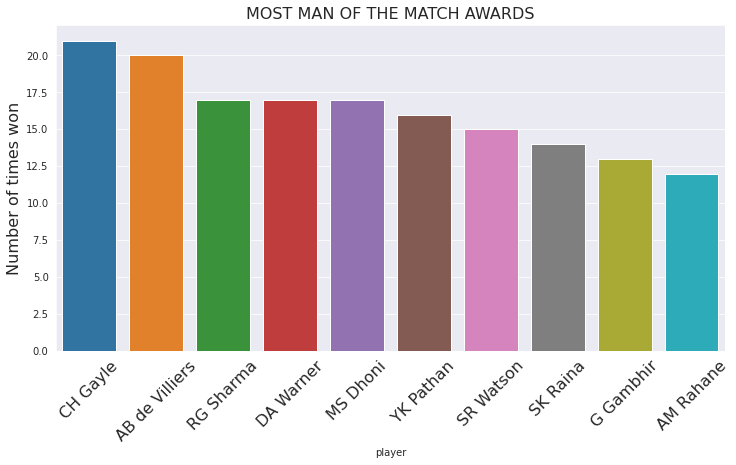

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x = most_mom_df.player, y = most_mom_df["num of time won"])
plt.ylabel("Number of times won",fontsize = 16)
plt.xticks(fontsize = 16,rotation = 45)
plt.title("MOST MAN OF THE MATCH AWARDS",{"fontsize":16});

In [44]:
## making a list of all seasons

season_column = df.Season.unique()
season_column

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [45]:
season_column = np.sort(season_column)

## Let us look which year has been a golden year for which team. 

In [46]:
  highest_win_percentage_by_year = []
  team_with_highest_win_percentage = []

In [47]:
for season in season_column:

  df_by_year = df[df["Season"] == season]
  team_most_wins = df_by_year.winner.value_counts().index[0]
  number_of_wins = df_by_year.winner.value_counts()[0]
  matches_played = len(df_by_year[(df_by_year.team1 == team_most_wins)|(df_by_year.team2 == team_most_wins)])
  percentage = np.round(number_of_wins*100/matches_played,2)
  highest_win_percentage_by_year.append(percentage)
  team_with_highest_win_percentage.append(team_most_wins)

In [48]:
highest_win_percentage_by_year

[81.25,
 66.67,
 68.75,
 68.75,
 70.59,
 68.42,
 70.59,
 62.5,
 64.71,
 70.59,
 68.75,
 68.75]

In [49]:
team_with_highest_win_percentage

['RR',
 'Delhi',
 'MI',
 'CSK',
 'KKR',
 'MI',
 'Punjab',
 'MI',
 'SRH',
 'MI',
 'CSK',
 'MI']

In [50]:
## creating a dataframe from above results:

most_successful_team_by_year = pd.DataFrame({"Season" : season_column,"team" : team_with_highest_win_percentage,"win_percentage":highest_win_percentage_by_year})

In [51]:
most_successful_team_by_year

,Season,team,win_percentage
0,2008,RR,81.25
1,2009,Delhi,66.67
2,2010,MI,68.75
3,2011,CSK,68.75
4,2012,KKR,70.59
5,2013,MI,68.42
6,2014,Punjab,70.59
7,2015,MI,62.50
8,2016,SRH,64.71
9,2017,MI,70.59


In [52]:
for index,data in enumerate(most_successful_team_by_year.win_percentage):
  print(index,data)

0 81.25
1 66.67
2 68.75
3 68.75
4 70.59
5 68.42
6 70.59
7 62.5
8 64.71
9 70.59
10 68.75
11 68.75


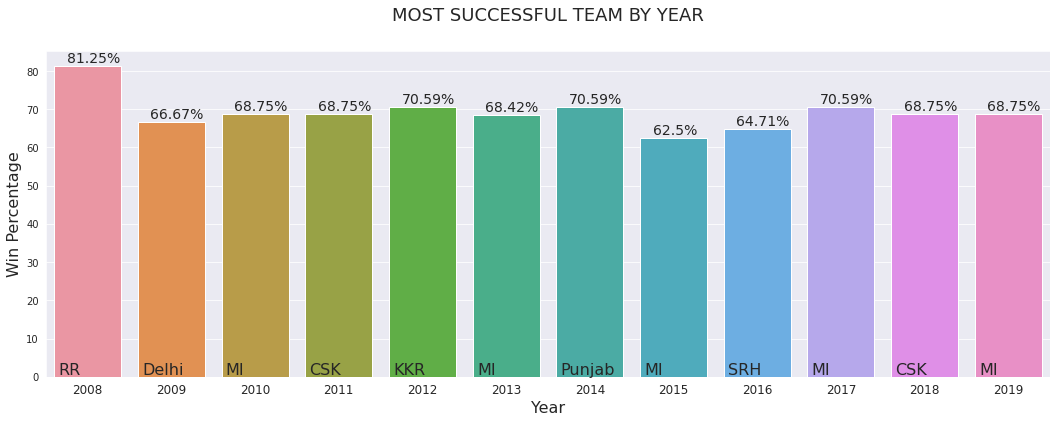

In [53]:
plt.figure(figsize=(18,6))
sns.barplot(data = most_successful_team_by_year,x = "Season" ,y = "win_percentage")
plt.xlabel("Year",fontsize = 16)
plt.ylabel("Win Percentage",fontsize = 16)
for index,data in enumerate(most_successful_team_by_year.win_percentage):
  plt.text(x=index - 0.25,y=data+1,s=f"{data}%",fontsize = 14)
for index,data in enumerate(most_successful_team_by_year.team):
  plt.text(x=index - 0.35,y=0.6,s=f"{data}",fontsize = 16)
plt.xticks(fontsize=12)
plt.title("MOST SUCCESSFUL TEAM BY YEAR",fontsize=18,pad=30);

In [54]:
df.head(2)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-05-04,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-06-04,MI,Pune,Pune,field,normal,0,Pune,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [55]:
toss_factor = df.toss_winner == df.winner

In [56]:
toss_factor

0      False
1       True
2       True
3       True
4       True
       ...  
751     True
752    False
753     True
754     True
755     True
Length: 756, dtype: bool

In [57]:
toss_factor.value_counts()

True     393
False    363
dtype: int64

In [58]:
toss_data = { "Matches_won_by_toss_winner" : 393,
              "Matches_won_by_toss_looser" : 363}
toss_data = pd.Series(toss_data)

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
toss_data.index

Index(['Matches_won_by_toss_winner', 'Matches_won_by_toss_looser'], dtype='object')

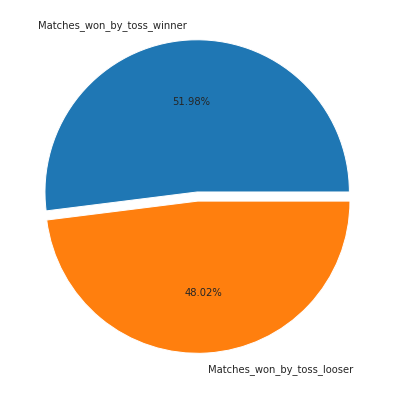

In [61]:
plt.figure(figsize=(7,7))
plt.pie(x=toss_data,autopct="%.2f%%",explode=[0.03]*2,labels=toss_data.index);

We can conclude that toss is not that big of a factor.

In [62]:
df.iloc[0]

Season                                                  2017
city                                               Hyderabad
date                                     2017-05-04 00:00:00
team1                                                    SRH
team2                                                    RCB
toss_winner                                              RCB
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                                   SRH
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
Name: 0, dtype: object

## Let's see  whether a team setting a target or chasing has got an edge.. 

In [63]:
team_won_batting = 0
team_won_fielding = 0

for i in range(0,len(df)):
  if df["toss_decision"][i] == "field":
    if df["toss_winner"][i] == df["winner"][i]:
      team_won_fielding += 1
    else:
      team_won_batting += 1
  else:
    if df["toss_winner"][i] == df["winner"][i]:
      team_won_batting += 1
    else:
      team_won_fielding += 1

In [64]:
team_won_batting

338

In [65]:
team_won_fielding

418

We can say that team chasing has got some edge against team setting the targets.

In [66]:
## Lets see that how many close-encounters are being produced by IPL and which team has mostly been involved in it.

df_thrillers = df[((df['win_by_wickets'] > 0) & (df['win_by_wickets'] < 2)) | ((df['win_by_runs'] > 0) & (df['win_by_runs'] < 6))]

In [67]:
df_team1 = pd.DataFrame(df_thrillers['team1'].value_counts())

In [68]:
df_team2 = pd.DataFrame(df_thrillers["team2"].value_counts())

In [69]:
df_thrill = pd.concat([df_team1,df_team2],axis=1)

In [70]:
df_thrill 

,team1,team2
MI,9,5.0
Punjab,8,5.0
RCB,5,3.0
SRH,5,6.0
CSK,4,5.0
RR,3,3.0
Delhi,3,6.0
KKR,3,6.0
GL,1,NaN
Pune,1,3.0


In [71]:
df_thrill = df_thrill[:5]

In [72]:
df_thrill["team2"] = df_thrill["team2"].astype(int)

In [73]:
df_thrill

,team1,team2
MI,9,5
Punjab,8,5
RCB,5,3
SRH,5,6
CSK,4,5


In [74]:
df_thrill["total_thrillers"] = df_thrill["team1"] + df_thrill["team2"]

In [75]:
teams_with_most_thrillers = df_thrill["total_thrillers"]

In [76]:
teams_with_most_thrillers

MI        14
Punjab    13
RCB        8
SRH       11
CSK        9
Name: total_thrillers, dtype: int64

##Conclusions:


*   Mumbai Indians has been the most successful team over the years.
*   Chennai Super Kings has been the most consistent team.
*   Gayle and ABD has been the biggest match winners.
*   Toss is not a big factor in IPL.
*   Chasing team has got an slight advantage.
*   The first season for Rajasthan has been the most successful year for any team.





